# ANGOLO DI BREWSTER

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from mylib import Interpolazione, final_val

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'brewster.csv'
fr = pd.read_csv(FILE)

In [12]:
V90 = np.array(fr['V90'])
sigmaV90 = np.array(fr['sigmaV90'])
teta90 = np.array(fr['teta90'])
sigmaθ = np.ones_like(teta90)

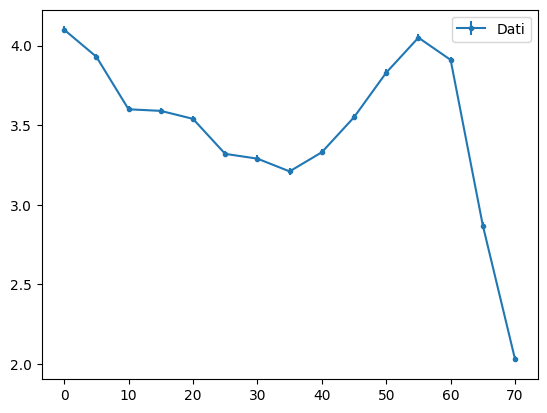

In [13]:
plt.errorbar(teta90, V90, yerr=sigmaV90, fmt='.-', label='Dati')
plt.legend()
plt.show()

TODO: raccogliere ulteriori misure dell'intorno dell'angolo di brewster, eventualmente ricavare il coeff di rifrazione del materiale, segnare il materiale, distanze, trovare coeff trasmissione e di riflessione

In [14]:
def parabola(x, a, b, θ):
    return a * (x - θ)**2 + b

a1, a2 = 9, 14
fit_angolo_bragg = Interpolazione(teta90[a1:a2], V90[a1:a2], sigmaV90[a1:a2], sigmaθ[a1:a2], parabola, [-0.1, 4, 55],names=['a', 'b', 'θ'],iteration=2)

print(fit_angolo_bragg)

----------------- VALORI FIT: -----------------
a: (-9.052 ± 1.324)e-3 
b: 4.06 ± 0.029 
θ: (5.423 ± 0.047)e1 

dof: 2
chi2: 5.84
chi2 ridotto: 2.92
pvalue: 0.05
------------------------------------------------



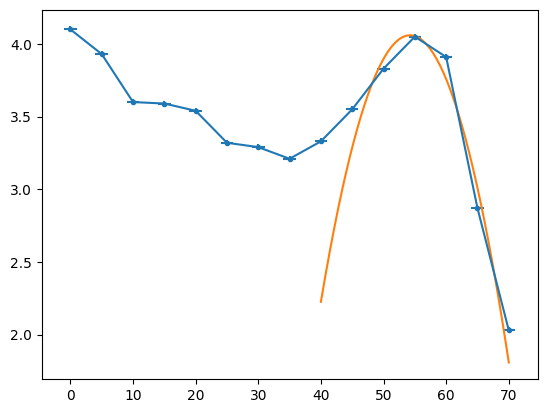

In [24]:
plt.errorbar(teta90, V90, yerr=sigmaV90,xerr=sigmaθ, fmt='.-', label='Dati')

x = np.linspace(teta90[a1-1], teta90[a2], 1000)
plt.plot(x, parabola(x, *list(fit_angolo_bragg.values.values())), label='Fit')

plt.show()